In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
#pd.set_option('mode.chained_assignment', None) # Deshabilita SettingWithCopyWarning. Ojo.


In [2]:

# Cargamos el dataframe
df = pd.read_csv('data/train.csv', index_col='id', parse_dates=['fecha'])


In [ ]:
df.titulo

In [ ]:

print(f"Shape: {df.shape}")
print(f"Columnas: {df.columns}")
df.head()

In [ ]:
df['tipodepropiedad'].unique()

In [ ]:
df[df.tipodepropiedad == 'Apartamento'].head(10)

In [ ]:
df['tipodepropiedad'].value_counts()

df.groupby(['provincia', 'ciudad']).ciudad.value_counts().nlargest(10)


In [ ]:
df['provincia'].value_counts().head(10)

In [ ]:
df[df.provincia == 'Distrito Federal'].groupby(['tipodepropiedad']).ciudad.value_counts()

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f');

In [ ]:
df.corr()

In [ ]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

#df = pd.DataFrame({'Correlacion':so.index, 'count':so.values})

print(so[so.values < 1.0].head(25))

In [ ]:
so = df.groupby(by=['provincia','tipodepropiedad']).size().sort_values(kind="quicksort", ascending=False)
#print(so)
#print(so[so.values < 1.0].head(25))

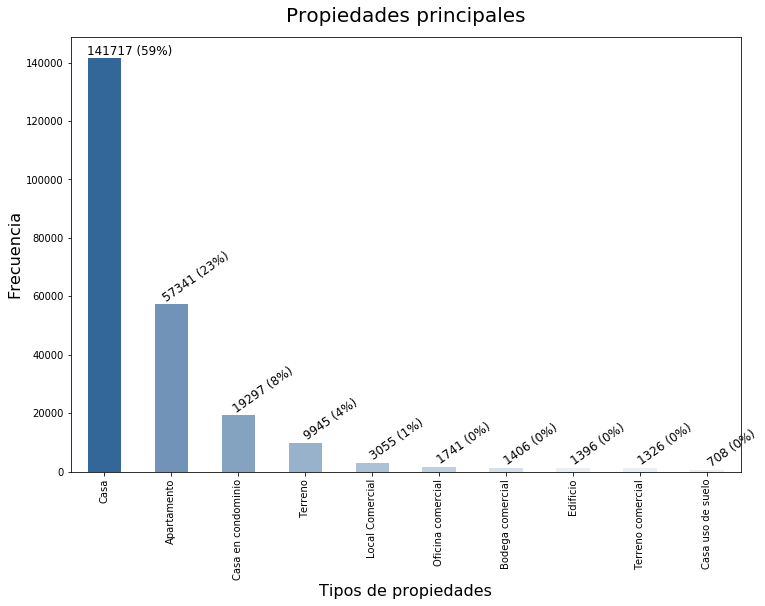

In [6]:
tiposPrincipales = df.tipodepropiedad.value_counts().sort_values(kind="quicksort", ascending=False).to_frame()
tiposPrincipales['porcentaje'] = tiposPrincipales.values / tiposPrincipales.values.sum() * 100
tiposPrincipales = tiposPrincipales.head(10)

# print(tiposPrincipales)
plt.figure(figsize=(12, 8))
ax = tiposPrincipales.tipodepropiedad.plot(kind='bar', color=[(0.2, 0.4, 0.6, 1)
                                                            , (0.2, 0.4, 0.6, 0.7)
                                                            , (0.2, 0.4, 0.6, 0.6)
                                                            , (0.2, 0.4, 0.6, 0.5)
                                                            , (0.2, 0.4, 0.6, 0.4)
                                                            , (0.2, 0.4, 0.6, 0.3)
                                                            , (0.2, 0.4, 0.6, 0.2)
                                                            , (0.2, 0.4, 0.6, 0.1)
                                                            , (0.2, 0.4, 0.6, 0.1)
                                                            , (0.2, 0.4, 0.6, 0.1)                                                             
                                                             ])
ax.set_title('Propiedades principales', fontsize=20, y=1.02)
ax.set_xlabel('Tipos de propiedades', fontsize=16)
ax.set_ylabel('Frecuencia', fontsize=16)
ax.set_xticklabels(tiposPrincipales.tipodepropiedad.index)

rects = ax.patches
# Make some labels.
# print(tiposPrincipales[:1].porcentaje)
# print(len(tiposPrincipales.index))
labels = [str(int(row.tipodepropiedad)) + ' (' + str(int(row.porcentaje)) + '%)' for index, row in tiposPrincipales.iterrows()]
# print(labels)
angle = 0
i = 0
for rect, label in zip(rects, labels):
    if i != 0:
        angle = 35
    height = rect.get_height()
    ax.text(rect.get_x() + (rect.get_width() * 5 / 4) , height + 5, label,
            ha='center', va='bottom', fontsize=12, rotation=angle)#, rotation_mode='anchor' )
    i += 1

# # fig.tight_layout()
plt.show()
# plt.savefig('tipos-propiedades.png')

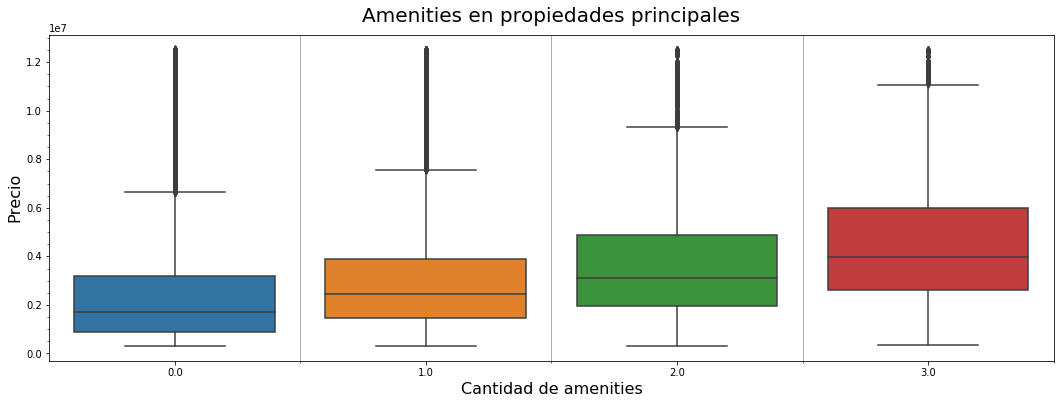

In [7]:
df['amenities'] = df.gimnasio + df.usosmultiples + df.piscina
dfProps = df[df.tipodepropiedad.isin(tiposPrincipales.index)]

from matplotlib.ticker import AutoMinorLocator
fig = plt.figure(figsize=(18,6))
ax1 = sns.boxplot('amenities', "precio", data=dfProps)

ax1.set_title('Amenities en propiedades principales', fontsize=20, y=1.02)
ax1.set_xlabel('Cantidad de amenities', fontsize=16)
ax1.set_ylabel('Precio', fontsize=16)
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1)

    # plt.savefig('cajas-amenities.png')

TypeError: 'int' object is not callable

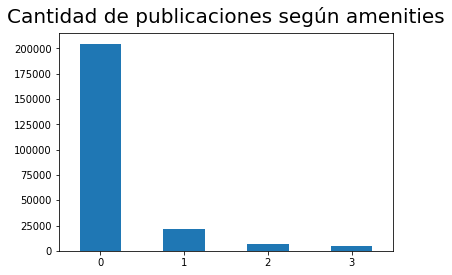

<Figure size 864x576 with 0 Axes>

In [40]:
ax = dfProps.groupby("amenities").amenities.value_counts().plot(kind='bar')
ax.set_title('Cantidad de publicaciones según amenities', fontsize=20, y=1.02)
ax.set_xlabel('', fontsize=16)
labels = [str(int(index[0])) for index, row in dfProps.groupby("amenities").amenities.value_counts().to_frame().iterrows()]
ax.set_xticklabels(labels, rotation=0)


plt.figure(figsize=(12, 8))
rects = ax.patches
# print(labels)

# place a text box in upper left in axes coords
# ax.text(0.05, 0.95, 'Pruebin', transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)
i = 0
for rect, label in zip(rects, labels):
    if i not in [0,3]:
        aux = df[df.amenities == i]
        text = 'Piscinas: ' + str(df.piscina.size()) + '\n' + \
               'Gimnasio: ' + str(df.gimnasio.size()) + '\n' + \
               'Usos múltiples: ' + str(df.usosmultiples.size())
        print(text)
#         df.gimnasio + df.usosmultiples + df.piscina
        height = rect.get_height()
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(rect.get_x() + (rect.get_width() / 2) , height * 1.5, label,
                bbox=props, 
                ha='center', va='bottom', fontsize=12, rotation=angle)
        
        
# #         ax.text(rect.get_x() + (rect.get_width() * 5 / 4) , height + 5, label,
# #                 ha='center', va='bottom', fontsize=12, rotation=angle)#, rotation_mode='anchor' )
    i += 1

plt.show()

In [8]:
regiones = pd.read_csv('data/regionesMexico.csv',encoding = "UTF-8")
# regiones.info()
df = df.merge(regiones,on='provincia', how='inner')
# df.info()
df.groupby('zona')

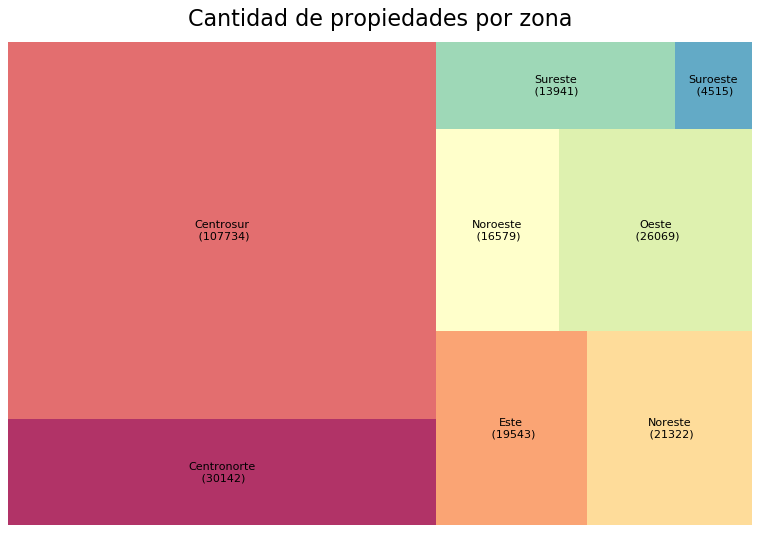

In [10]:
# pip install squarify
import squarify 

# Prepare Data
df_zonas = df.groupby('zona').size().reset_index(name='counts')
labels = df_zonas.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_zonas['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Cantidad de propiedades por zona', fontsize=20, y=1.02)
plt.axis('off')
plt.show()
# plt.savefig('zonas-cant.png')

TypeError: expected string or bytes-like object

C:\Users\Lucas\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


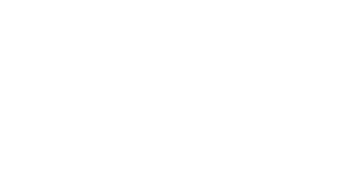

In [47]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, MultiPoint, Polygon


def plot_countries(df,projection,colors,annotation,title,edgecolor):

    ax = plt.axes(projection=projection)
    ax.add_feature(cartopy.feature.OCEAN, facecolor='white')
    ax.outline_patch.set_edgecolor(edgecolor)

#     shpfilename = shpreader.natural_earth(resolution='110m',
#                                           category='cultural',
#                                           name='admin_0_countries')
    shpfilename = gpd.read_file('data/estadosMexico.shx')
    reader = shpreader.Reader(shpfilename)
    countries = reader.records()
    values = list(df[title].unique())

    for country in countries:
        attribute = 'ADM0_A3'
        ADM0_A3 = country.attributes['ADM0_A3']

        # get classification
        try:
            classification = df.loc[country.attributes[attribute]][title]
        except:
            pass

        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=(colors[values.index(classification)]),
                          label=country.attributes[attribute],
                          edgecolor='#FFFFFF',
                          linewidth=.25)

    # legend
    import matplotlib.patches as mpatches
    handles = []
    for i in range(len(values)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i]))
        plt.legend(handles, values,
                   loc='lower left', bbox_to_anchor=(0.025, -0.0), 
                   fancybox=True, frameon=False, fontsize=5)

    # annotate
    ax.annotate(annotation, xy=(0, 0),  xycoords='figure fraction',
            xytext=(0.0275, -0.025), textcoords='axes fraction',
            horizontalalignment='left', verticalalignment='center', fontsize=4,
            )

    plt.title(title, fontsize=8)

    title = 'maps/'+title+'.png'
    plt.savefig(title, bbox_inches='tight', pad_inches=.2, dpi=300)
    print('Saved: {}'.format(title))


def main():
#     df = pd.read_csv('countries.csv', index_col='ISO_CODE')
    provs = df.groupby(['provincia']).precio.agg('mean').to_frame()
    provs['name'] = provs.index

    projection = ccrs.Robinson()
    title = 'Headmap provincias'
    colors = ['#f4b042', '#92D050','#71a2d6','#b282ac','#DDDDDD']
    #colors = ['#orange' ,'#green','#blue ','#purple','#grey  ']
    annotation = 'Headmap de precios de las provincias'
    plot_countries(df,projection,colors,annotation,title,edgecolor='white')

#     projection = ccrs.Orthographic(-30,40)
#     colors = ['#71a2d6','#DDDDDD']
#     annotation = 'NATO Member Countries: https://en.wikipedia.org/wiki/Member_states_of_NATO'
#     title = 'NATO Members'
#     plot_countries(df,projection,colors,annotation,title,edgecolor='grey')

    projection = ccrs.Orthographic(10,50)
    colors = ['#000099','#DDDDDD']
    annotation = 'EU Member Countries: https://en.wikipedia.org/wiki/Member_state_of_the_European_Union'
    title = 'EU Members'
    plot_countries(df,projection,colors,annotation,title,edgecolor='grey')

    print('Done.\n')


if __name__ == '__main__':
    main()

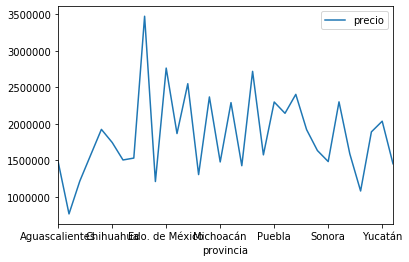

In [46]:
import geopandas as gpd
from shapely.geometry import Point, MultiPoint, Polygon
import cartopy.io.shapereader as shpreader

mex = gpd.read_file('data/estadosMexico.shx')
mex = mex[mex.admin == 'Mexico'][['name', 'geometry']]
provs = df.groupby(['provincia']).precio.agg('mean').to_frame()
provs['name'] = provs.index
# provs.info()
# provs.columns = ['name', 'precio']
provs.merge(mex, on='name', how='inner')
provs.plot()

# df = df.merge(regiones,on='provincia', how='inner')
# reader.head()
# mex.sample()
# mex[country=='mexico'].plot()

zona
Centronorte    AxesSubplot(0.125,0.125;0.775x0.755)
Centrosur      AxesSubplot(0.125,0.125;0.775x0.755)
Este           AxesSubplot(0.125,0.125;0.775x0.755)
Noreste        AxesSubplot(0.125,0.125;0.775x0.755)
Noroeste       AxesSubplot(0.125,0.125;0.775x0.755)
Oeste          AxesSubplot(0.125,0.125;0.775x0.755)
Sureste        AxesSubplot(0.125,0.125;0.775x0.755)
Suroeste       AxesSubplot(0.125,0.125;0.775x0.755)
Name: antiguedad, dtype: object

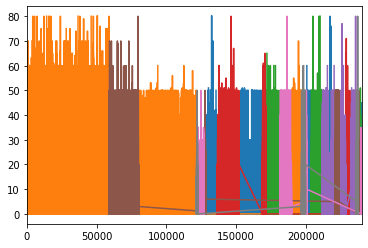

In [12]:

df.groupby('zona').antiguedad.plot()

In [ ]:
#Intento medio pelo para 
import joypy
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(df.groupby('zona'), column=['antiguedad'], by="class", ylim='own', figsize=(14,10))

# Decoration
plt.title('Joy Plot antiguedad por zonas', fontsize=22)
plt.show()


In [ ]:
#Adaptar lo de abajo. Es: Stacked Area Chart. 1podría ser para mostrar 'sumados' la antiguedad de los edificios por región

In [ ]:
# Decide Colors 
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)
columns = df.columns[1:]
labs = columns.values.tolist()

# Prepare data
x  = df['yearmon'].values.tolist()
y0 = df[columns[0]].values.tolist()
y1 = df[columns[1]].values.tolist()
y2 = df[columns[2]].values.tolist()
y3 = df[columns[3]].values.tolist()
y4 = df[columns[4]].values.tolist()
y5 = df[columns[5]].values.tolist()
y6 = df[columns[6]].values.tolist()
y7 = df[columns[7]].values.tolist()
y = np.vstack([y0, y2, y4, y6, y7, y5, y1, y3])

# Plot for each column
labs = columns.values.tolist()
ax = plt.gca()
ax.stackplot(x, y, labels=labs, colors=mycolors, alpha=0.8)

# Decorations
ax.set_title('Night Visitors in Australian Regions', fontsize=18)
ax.set(ylim=[0, 100000])
ax.legend(fontsize=10, ncol=4)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(10000, 100000, 20000), fontsize=10)
plt.xlim(x[0], x[-1])

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.show()

In [ ]:
### Tipos de propiedas principales ###
tiposPrincipales = df.tipodepropiedad.value_counts().sort_values(kind="quicksort", ascending=False).to_frame().head(10)
#print(tiposPrincipales.values)
plt.figure(figsize=(18,6))
tiposPrincipales.plot(kind='bar')

tiposPrincipales['porcentaje'] = tiposPrincipales.values / tiposPrincipales.values.sum()
#print(tiposPrincipales.porcentaje)
print(tiposPrincipales)


In [ ]:
df[df.tipodepropiedad.isin(tiposPrincipales.head(5).tipodepropiedad.index)].info

In [ ]:
    df[df.tipodepropiedad.isin(tiposPrincipales.head(5).tipodepropiedad.index)].groupby(['provincia']).tipodepropiedad.value_counts()
    #print(tiposPrincipales.head(5).tipodepropiedad.index)

In [ ]:
df[df.tipodepropiedad.isin(tiposPrincipales.head(5).tipodepropiedad.index)].groupby(['provincia']).tipodepropiedad.value_counts()
#print(tiposPrincipales.head(5).tipodepropiedad.index)

In [ ]:
df['amenities'] = df.gimnasio + df.usosmultiples + df.piscina #+ df.escuelascercanas + df.centroscomercialescercanos
df['plus']  = df.habitaciones + df.banos + df.garages + df.gimnasio + df.usosmultiples + df.piscina + df.escuelascercanas + df.centroscomercialescercanos

In [ ]:
# df[['amenities', 'precio']].plot(x ='amenities', y='precio', kind = '')
dfProps = df[df.tipodepropiedad.isin(tiposPrincipales.head(5).tipodepropiedad.index)]

from matplotlib.ticker import AutoMinorLocator
fig = plt.figure(figsize=(18,6))
ax1 = sns.boxplot('amenities', "precio", data=dfProps) #, hue='modelLine')
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1)

In [ ]:
# Barras desmembrando eso
# Distribucion amenities
#df[['gimnasio', 'usosmultiples', 'piscina', 'amenities']].groupby('amenities').sum().plot(kind='bar');
# Precio vs amenities
#df[['amenities', 'precio']].groupby('amenities').agg({'precio':np.mean}).plot(kind='bar');

from pandas.plotting import parallel_coordinates

# Plot
plt.figure(figsize=(12,9), dpi= 80)
parallel_coordinates(
    df[['gimnasio', 'usosmultiples', 'piscina', 'garages', 'banos', 'habitaciones', 'precio']], 
    'precio')

# # Lighten borders
# plt.gca().spines["top"].set_alpha(0)
# plt.gca().spines["bottom"].set_alpha(.3)
# plt.gca().spines["right"].set_alpha(0)
# plt.gca().spines["left"].set_alpha(.3)

# plt.title('Parallel Coordinated of Diamonds', fontsize=22)
# plt.grid(alpha=0.3)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
plt.show()


In [ ]:
df['amenities'].head()

In [ ]:
# df[['amenities', 'precio']].plot(x ='amenities', y='precio', kind = '')
dfProps = df[df.tipodepropiedad.isin(tiposPrincipales.head(5).tipodepropiedad.index)]

from matplotlib.ticker import AutoMinorLocator
fig = plt.figure(figsize=(18,6))
ax1 = sns.boxplot('plus', "precio", data=dfProps) #, hue='modelLine')
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1)

In [ ]:
df['banos-metros'] = df['metroscubiertos'] / df['banos']
df['precio-bano-mts'] = df['precio'] /df['banos-metros']
plt.figure(figsize=(16,10), dpi= 80)

# fig=plt.subplots(1,2)
# sns.barplot(x=df['banos-metros'],y=df['precio'])
# sns.kdeplot(df[['banos-metros']], shade=True, color="g", label="Cyl=4", alpha=.7)
sns.distplot(df['banos-metros'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

# sns.barplot(x=df['gimnasio'],y=df['precio_usd'],ax=ax[1])
plt.show()

In [ ]:
# Plot de correlaciones

plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df[['metroscubiertos', 'metrostotales', 'precio']], kind="reg", hue="precio")
plt.show()